In [327]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


d:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [332]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [333]:
%matplotlib inline

In [148]:
set_printoptions(formatter={'float': '{:>11.3f}'.format})

# Загрузка данных

In [2]:
breast_cancer_data = load_breast_cancer()
breast_cancer_data, breast_cancer_target = load_breast_cancer(return_X_y=True)

# Матрицы ковариации и признаки

## Диаграмма рассеяния для двух произвольно взятых признаков

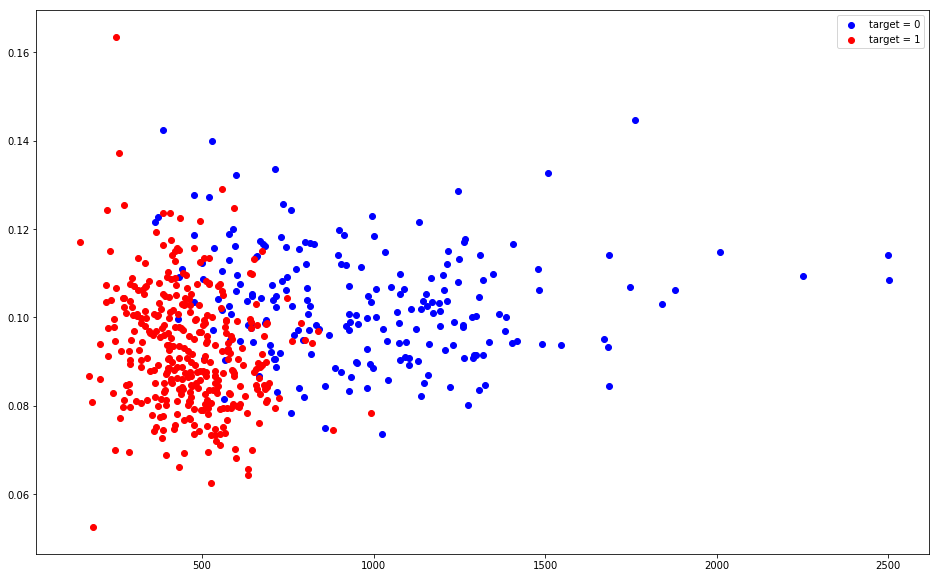

In [101]:
figsize(16, 10)
cmap = ('b', 'r')
for i in range(len(cmap)):
    scatter(breast_cancer_data[breast_cancer_target == i,3], 
            breast_cancer_data[breast_cancer_target == i,4], 
            c=cmap[i], 
            label='target = {}'.format(i))
legend()
None

## Матрица ковариации исходных данных

In [182]:
covariation_matrix = cov(breast_cancer_data.T)
print(covariation_matrix[:6, :6])

[[     12.419       4.908      85.447    1224.483       0.008       0.094]
 [      4.908      18.499      34.440     485.994      -0.001       0.054]
 [     85.447      34.440     590.440    8435.772       0.071       0.715]
 [   1224.483     485.994    8435.772  123843.554       0.876       9.265]
 [      0.008      -0.001       0.071       0.876       0.000       0.000]
 [      0.094       0.054       0.715       9.265       0.000       0.003]]


Для удобства показаны только первые 6 строк и столбцов (и в дальнейшем также)

### Проверка корректности собственных значений и векторов

In [156]:
print(matmul(matmul(eigenvectors, diag(eigenvalues)), inv(eigenvectors))[:6, :6])

[[     12.419       4.908      85.447    1224.483       0.008       0.094]
 [      4.908      18.499      34.440     485.994      -0.001       0.054]
 [     85.447      34.440     590.440    8435.772       0.071       0.715]
 [   1224.483     485.994    8435.772  123843.554       0.876       9.265]
 [      0.008      -0.001       0.071       0.876       0.000       0.000]
 [      0.094       0.054       0.715       9.265       0.000       0.003]]


### Расчет главных компонент

In [153]:
pca = PCA()
breast_cancer_data_pca = pca.fit_transform(breast_cancer_data)

### Матрица ковариации исходных данных, спроецированная на главные компоненты

In [184]:
covariation_matrix_pca = cov(breast_cancer_data_pca.T)
print(covariation_matrix_pca[:6, :6])

[[ 443782.605      -0.000      -0.000       0.000      -0.000       0.000]
 [     -0.000    7310.100       0.000      -0.000      -0.000       0.000]
 [     -0.000       0.000     703.834       0.000      -0.000       0.000]
 [      0.000      -0.000       0.000      54.649       0.000      -0.000]
 [     -0.000      -0.000      -0.000       0.000      39.890      -0.000]
 [      0.000       0.000       0.000      -0.000      -0.000       3.005]]


### Проверка, что главные компоненты ортогональны

In [163]:
print(matmul(pca.components_, pca.components_.T)[:6, :6])

[[      1.000       0.000       0.000       0.000       0.000       0.000]
 [      0.000       1.000      -0.000      -0.000       0.000      -0.000]
 [      0.000      -0.000       1.000      -0.000      -0.000      -0.000]
 [      0.000      -0.000      -0.000       1.000      -0.000       0.000]
 [      0.000       0.000      -0.000      -0.000       1.000      -0.000]
 [      0.000      -0.000      -0.000       0.000      -0.000       1.000]]


При произведении матрицы на ее транспонированный вариант получилась единичная матрица, следовательно исходная матрица была ортогональной. Т.е. все главные компоненты ортогональны

### Сравнение собственных значений матрицы ковариации исходных данных со значениями дисперсии главных компонент

#### Собственные значения матрицы ковариации исходных данных

In [166]:
eigenvalues, eigenvectors = linalg.eig(covariation_matrix)
print(eigenvalues)

[ 443782.605    7310.100     703.834      54.649      39.890       3.005
       1.815       0.371       0.156       0.084       0.032       0.007
       0.003       0.002       0.001       0.001       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000]


#### Значения дисперсии главных компонент

In [205]:
print(diagonal(covariation_matrix_pca))

[ 443782.605    7310.100     703.834      54.649      39.890       3.005
       1.815       0.371       0.156       0.084       0.032       0.007
       0.003       0.002       0.001       0.001       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000
       0.000       0.000       0.000       0.000       0.000       0.000]


### Сравнение следов матрицы ковариации исходных данных и матрицы ковариации данных, спроецированных на главные компоненты

#### След матрицы ковариации исходных данных

In [183]:
trace(covariation_matrix)

451896.55625739862

#### След матрицы ковариации исходных данных, спроецированных на главные компоненты

In [188]:
trace(covariation_matrix_pca)

451896.55625739874

Как видно, это значение не изменяется при проецировании на главные компоненты (с точностю до погрешности вычислений)

In [206]:
total_variance = trace(covariation_matrix)

### Графики объясненной дисперсии

In [207]:
explained_variance_ratio = diagonal(covariation_matrix) / total_variance

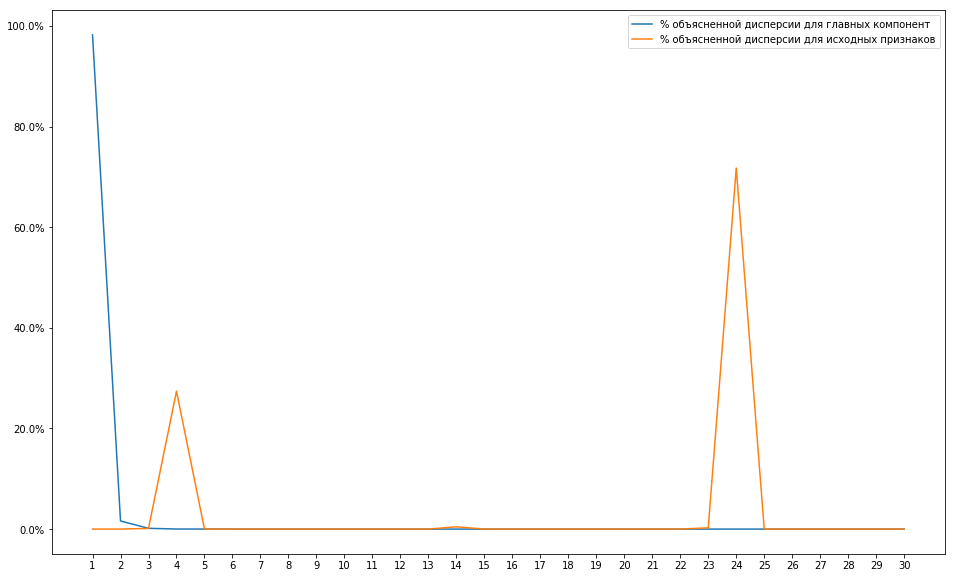

In [256]:
xx = range(1, 31)
axes().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.1%}'))
xticks(xx)
plot(xx, pca.explained_variance_ratio_, label='% объясненной дисперсии для главных компонент')
plot(xx, explained_variance_ratio, label='% объясненной дисперсии для исходных признаков')
legend()
None

# Классификация по исходным данным

## Разбиение выборки на тестовую и тренировочную

In [258]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_target, test_size=0.1, random_state=42)

## Обучение классификатора при произвольном k

In [293]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
print(f'Точность: {knn_clf.score(X_test, y_test):.2%}')

Точность: 96.49%


### Кроссвалидация на 10 фолдов

In [297]:
cv_scores = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=10)
print('Точности для различных фолдов: ', [f'{score:.1%}' for score in cv_scores])
print('Дисперсия: {:}'.format(var(cv_scores)))

Точности для различных фолдов:  ['92.3%', '94.2%', '98.1%', '90.4%', '90.4%', '94.1%', '94.1%', '92.0%', '90.0%', '88.0%']
Дисперсия: 0.0007487741856227342


### Графики зависимости точности от числа k и n

In [322]:
parameters = {'n_neighbors': (2, 3, 5, 7, 10, 15, 20)}
cv_clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy', n_jobs=-1, cv=10)
cv_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': (2, 3, 5, 7, 10, 15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [307]:
cv_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

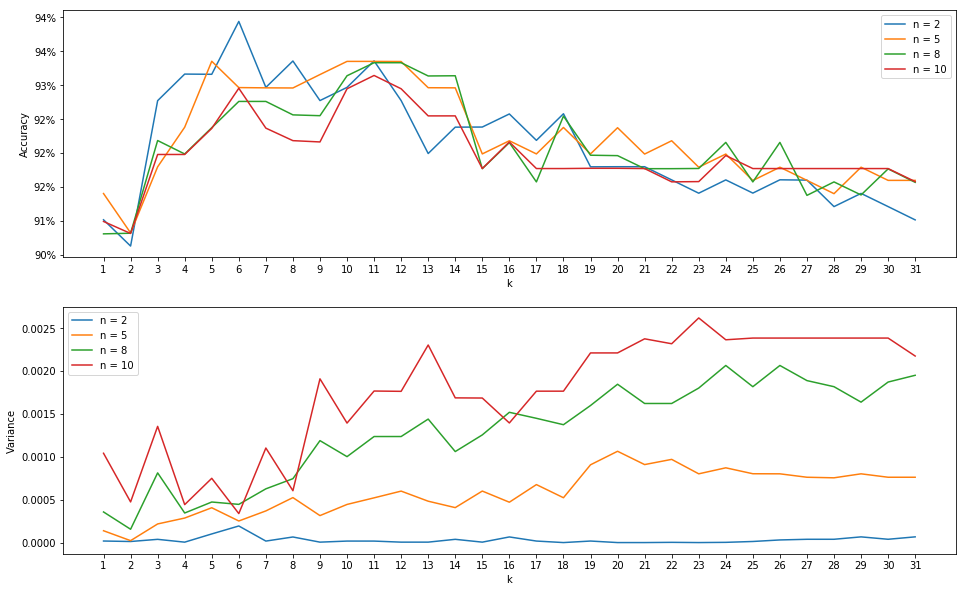

In [362]:
figsize(16, 10)
fig, (axes1, axes2) = subplots(nrows=2, ncols=1)
xx = range(1, 32)

for axes in (axes1, axes2):
    axes.set_xticks(xx)
    axes.set_xlabel('k')

axes1.set_ylabel('Accuracy')
axes2.set_ylabel('Variance')

axes1.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.0%}'))

for n in (2, 5, 8, 10):
    scores_variances = []
    scores_means = []
    for k in xx:
        cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, scoring='accuracy', cv=n)
        scores_variance = var(cv_scores)
        scores_mean = mean(cv_scores)
        scores_variances.append(scores_variance)
        scores_means.append(scores_mean)
    axes1.plot(xx, scores_means, label=f'n = {n}')
    axes2.plot(xx, scores_variances, label=f'n = {n}')

axes1.legend()
axes2.legend()

None

#### Вывод о сравнительном качестве предсказаний

По графикам видно, что чем большее количество фолдов изпользуется для кросс-валидации, тем больше разбров в значениях точности для различных фолдов

#### Наиболее приемлемый диапазон значений k

Наибольшее значение точности практически при любом количестве фолдов при кросс-валидации достигается при k = 11

# Классификация по данным, спроецированным на главные компоненты